# Practice Session 01+02: Data preparation

Author: <font color="blue">Bernat Quintillà Castellón</font>

E-mail: <font color="blue">bernat.quintilla01@estudiant.upf.edu</font>

Date: <font color="blue">04/10/2023</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import sklearn

In [3]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [4]:
input_dataset.head() #mostrem primeres 5 files de input_dataset

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [38]:
cols_df_list = []

for column in input_dataset.columns:
    column_name = column
    data_type = input_dataset[column].dtype #guardem type
    distinct_elem = input_dataset[column].nunique() #guardem number of distinct elements
  
    cols_df_list.append([column_name, data_type, distinct_elem]) #els afegim a la llista
    
column_type_df = pd.DataFrame(cols_df_list, columns=['Column Name', 'Data Type', 'Distinct Elements'])
column_type_df.head() #convertim llista en dataframe i mostrem 5 primeres files

,Column Name,Data Type,Distinct Elements
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182


In [6]:
float_cols = input_dataset.select_dtypes(include=['float64']) #seleccionem columnes de tipus float64

data = []

for column in float_cols.columns: #calculem i guardem a llista iterant per float_cols
    col_name = column
    col_mean = np.mean(float_cols[column])
    col_median = np.nanmedian(float_cols[column])
    col_min = np.min(float_cols[column])
    col_max = np.max(float_cols[column])
    
    data.append([col_name, col_mean, col_median, col_min, col_max])

stats_df = pd.DataFrame(data, columns=['Column Name', 'Mean', 'Median', 'Min', 'Max']) #creem dataframe amb nom de cada col.

stats_df.head()

,Column Name,Mean,Median,Min,Max
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,15.0,9057.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,20121001.0,20190501.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,0.0,127017.59
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,0.0,111948.84
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,0.0,111948.84


In [7]:
for column in input_dataset.columns: #mostrem estadístics de cada columna
    print(column, ":\n" , input_dataset[column].describe(),"\n")

PURCHASED_DEVICE :
 count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object 

DEVICE_VALUE :
 count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64 

LAST_DEVICE_CHANGE :
 count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64 

DATA_TRAFFIC_MONTH_1 :
 count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dt

Dels resultats de DEVICE_COST_MONTH_1 respecte els obtinguts amb la funció ```.describe()``` no trobo cap diferència numèrica. Tot i així la funció ```.describe()``` em dona més informació que els previs resultats, ja que mostra el tipus de dades que es troben a la columna i els quartils de la mostra. Podriem treure aquesta informació extra de la funció com les dues diferències entre els resultats.

## 1.2. Inventory of device models

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [8]:
previous_model = {}
previous_model_df = []
print("Census of PREVIOUS_DEVICE_MODEL:")
for data in input_dataset.PREVIOUS_DEVICE_MODEL: #mirem valors de la col. i si no es troba al diccionari inicialitzem a 0 sinó sumem 1
    if data not in previous_model.keys():
        previous_model[data] = 0
    previous_model[data] +=1
    
for key in previous_model.keys():
    previous_model_df.append({"Name":key,"Census":previous_model[key]}) #formem llista a partir del dict.
    
previous_model_df = pd.DataFrame(previous_model_df,columns=['Name','Census']) #formem df a partir de llista
previous_model_df.sort_values("Census",ascending=False).head() #mostrem els census ordenats de major a menor

Census of PREVIOUS_DEVICE_MODEL:


,Name,Census
8,NaN,3831
18,iPhone 7,425
3,iPhone 6,250
7,Samsung Galaxy J5,243
10,iPhone 6S,212


In [9]:
#Repetim el mateix procediment però amb la columna PREVIOUS_DEVICE_BRAND
previous_brand = {}
previous_brand_df = []
print("Census of PREVIOUS_DEVICE_BRAND:")
for data in input_dataset.PREVIOUS_DEVICE_BRAND:
    if data not in previous_brand.keys():
        previous_brand[data] = 0
    previous_brand[data] +=1
    
for key in previous_brand.keys():
    previous_brand_df.append({"Name":key,"Census":previous_brand[key]})
    
previous_brand_df = pd.DataFrame(previous_brand_df,columns=['Name','Census'])
previous_brand_df.sort_values("Census",ascending=False).head()

Census of PREVIOUS_DEVICE_BRAND:


,Name,Census
4,NaN,3831
1,Samsung,1877
3,Outros,1592
2,Apple,1548
0,Motorola,638


El device model més comú és el iPhone7 seguit del iPhone6, però la device brand més comuna és Samsung. Aquest fet pot haber estat provocat a causa de que molts dataframes de iPhone al camp de brand hi apareix NaN i no la marca iPhone, i això pot haber derivat a que finalment tot i que els models de mòvil de Samsung no ocupen les primeres posicions, es coloquen com a marca líder. Si eliminessim els NaN podriem visualitzar més clarament quina marca és realment la més popular, la qual podria seguir sent Samsung per la seva gran quantitat de models o iPhone pels seus models amb un número tan gran de ventes.

# 2. Feature engineering

## 2.1. Missing values management

In [10]:
nan_counter = []

for column in input_dataset.columns:
    nan_count = input_dataset[column].isna().sum() #we count the number of NaN values
    non_nan_count = input_dataset[column].count()  #we count the number of non-NaN values
    if nan_count > 0:
        nan_counter.append([column,nan_count,non_nan_count]) #si es troben NaN values, s'afegeixen els contadors a la llista
        
nan_counter = pd.DataFrame(nan_counter,columns=['Name','NaN','Non-NaN']) #creació dataframe amb la llista
nan_counter.head()

,Name,NaN,Non-NaN
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841


In [11]:
df01 = input_dataset.dropna(subset=['PURCHASED_DEVICE','DEVICE_VALUE','PREVIOUS_DEVICE_MODEL']) #drop rows with NaN values in these cols

In [12]:
df02 = df01.copy() #use of copy to not modify df01, just copy all information to df02
columns_to_fill = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                     'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                     'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                     'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                     'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                     'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                     'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6'] #I could have implemented a loop instead of this huge list but works correctly
df02[columns_to_fill] = df01[columns_to_fill].fillna(value=0) #we change NaN values to 0

In [13]:
df03 = df02.copy()
df03['LINE_ACTIVATION_DATE'].fillna(df02['LAST_DEVICE_CHANGE'], inplace=True) #we use the column we want to equalize in the value parameter of fillna function

In [14]:
df03.head(10) #mostrem 10 primeres files

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


In [15]:
print('Rows in the original dataset: ',input_dataset.shape[0],'\n')
print('Rows in the new dataset: ',df03.shape[0],'\n') #show rows of original dataset vs new dataset
percentage_rows = 100-(df03.shape[0]/input_dataset.shape[0])*100 #compute percentage of rows that were dropped
print('Percentage of rows dropped: ',percentage_rows,'%\n')

cols_w_nan = []
for column in df03.columns:
    if df03[column].isna().any(): #si trobem un NaN value a la columna afegim el header de la columna a la llista cols_w_nan
        cols_w_nan.append(column)
print('Names of the columns with NaN values: ',cols_w_nan)

Rows in the original dataset:  10000 

Rows in the new dataset:  5988 

Percentage of rows dropped:  40.12 %

Names of the columns with NaN values:  ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

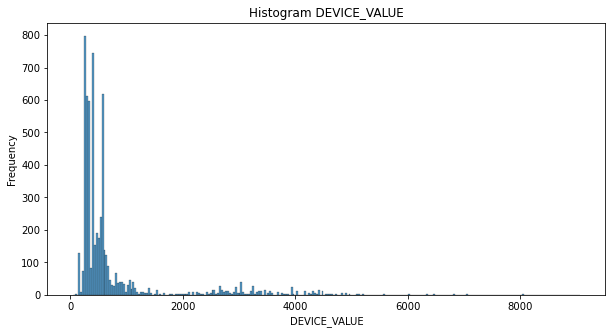

In [16]:
#Histograma DEVICE_VALUE
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='DEVICE_VALUE', kde=False)
plt.xlabel('DEVICE_VALUE')
plt.ylabel('Frequency')
plt.title('Histogram DEVICE_VALUE')
plt.show()

En aquest histograma es pot reconèixer una distribució normal amb dos pics de freqüència marcats fent la distribució bimodal.

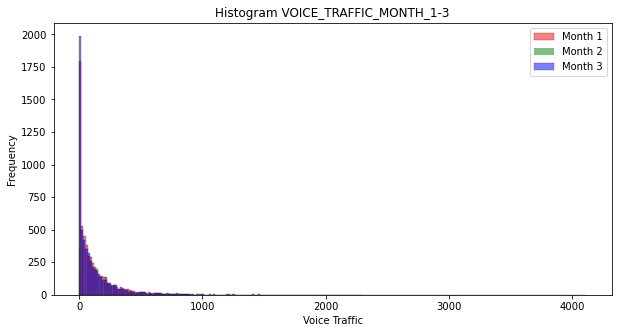

In [43]:
#Histograma VOICE_TRAFFIC_MONTH_1-3
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_1', kde=False, color='red', label='Month 1',alpha=0.5)
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_2', kde=False, color='green', label='Month 2',alpha=0.5)
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_3', kde=False, color='blue', label='Month 3',alpha=0.5)
plt.xlabel('Voice Traffic')
plt.ylabel('Frequency')
plt.title('Histogram VOICE_TRAFFIC_MONTH_1-3')
plt.legend()
plt.show()

Es pot identificar de forma clara una distribució exponencial amb un únic pic de freqüència, per tant és una distribució unimodal. Per la forma del histograma podem deduïr que el valor de paràmetre &lambda; de la distribució exponencial és elevat.

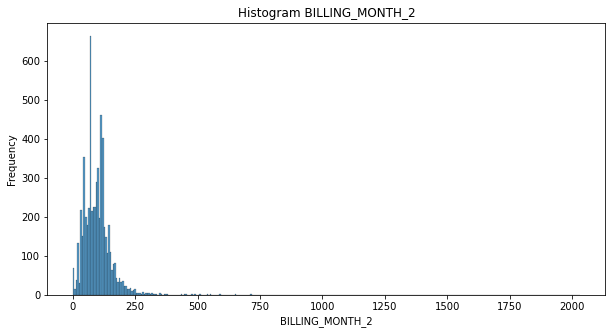

In [18]:
#Histograma BILLING_MONTH_2
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='BILLING_MONTH_2', kde=False)
plt.xlabel('BILLING_MONTH_2')
plt.ylabel('Frequency')
plt.title('Histogram BILLING_MONTH_2')
plt.show()

Es pot observar com l'histograma segueix una distribució normal amb un únic pic de freqüència formant una distribució unimodal.

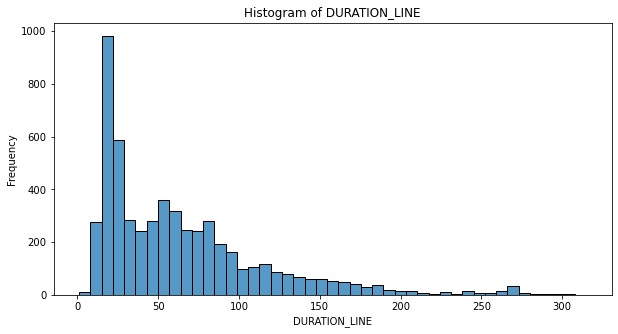

In [19]:
#Histograma DURATION_LINE
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='DURATION_LINE', kde=False)
plt.xlabel('DURATION_LINE')
plt.ylabel('Frequency')
plt.title('Histogram of DURATION_LINE')
plt.show()

Es dedueix una distribució exponencial amb un únic pic de freqüència, fent una distribució unimodal. Per la forma del histograma podem deduïr que el valor de paràmetre &lambda; de la distribució exponencial en aquest cas, no és tan elevat respecte l'histograma VOICE_TRAFFIC_MONTH_1-3.

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_2** and plot its new distribution.</font>

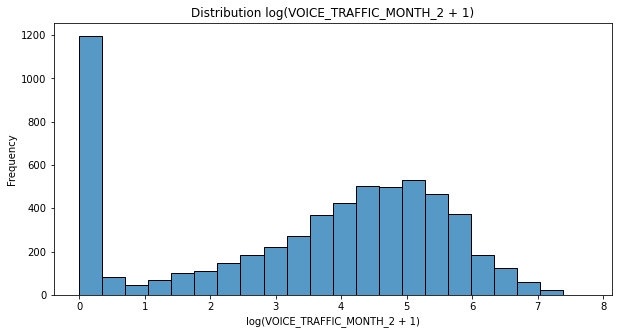

In [20]:
df03['VOICE_TRAFFIC_MONTH_2'] = np.log(df03['VOICE_TRAFFIC_MONTH_2'] + 1) #apliquem log(x+1) a la col indicada

plt.figure(figsize=(10, 5)) #fem plot de la seva nova distribució després d'aplicar log(x+1)
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_2', kde=False)
plt.xlabel('log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.ylabel('Frequency')
plt.title('Distribution log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.show()

Es pot observar com la distribució conté un segon pic màxim de frequència menor al primer però que visualment no era visible abans de aplicar ```log(x+1)```.

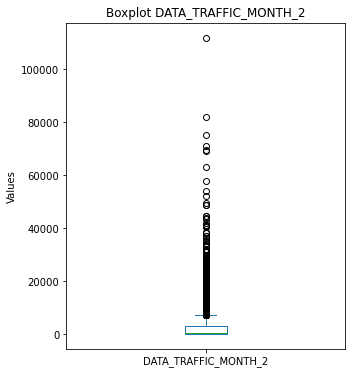

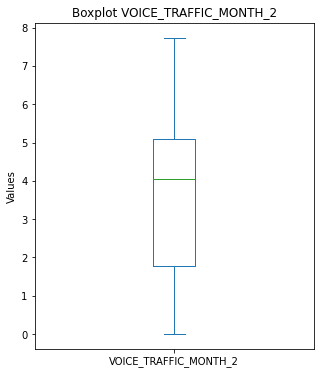

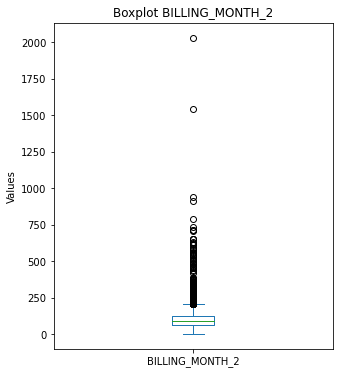

In [44]:
#mostrem els boxplots de les diferents columnes indicades
plt.figure(figsize=(5, 6))
df03['DATA_TRAFFIC_MONTH_2'].plot(kind='box')
plt.title('Boxplot DATA_TRAFFIC_MONTH_2')
plt.ylabel('Values')


plt.figure(figsize=(5, 6))
df03['VOICE_TRAFFIC_MONTH_2'].plot(kind='box')
plt.title('Boxplot VOICE_TRAFFIC_MONTH_2')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(5, 6))
df03['BILLING_MONTH_2'].plot(kind='box')
plt.title('Boxplot BILLING_MONTH_2')
plt.ylabel('Values')
plt.show()

Els valors que usaria com a threshold per els outliers són els bigotis de la caixa. És a dir, que les dades fora del rang ```[Q1-1.5*IQR,Q3+1.5*IQR]```, (sent ```IQR = Q3-Q1```), les consideraria outliers.

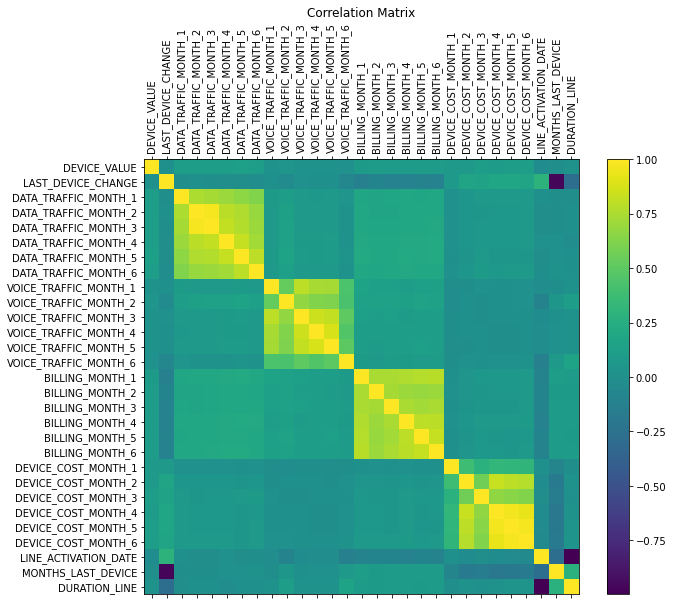

In [22]:
correlation_matrix = df03.corr() #calculem correlation matrix fent ús de .corr()

plt.figure(figsize=(10, 8))
ax = plt.gca()
c_ax = ax.matshow(correlation_matrix) #mostrem matriu com una imatge usant matshow
plt.colorbar(c_ax)

plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

Billing is in general more correlated with the data traffic than voice traffic. We can observe in the correlation matrix how the square that relates billing and data traffic is brighter than the square that relates billing with voice traffic.

## 2.3. Date management and period calculation

In [23]:
max_device = df03['LAST_DEVICE_CHANGE'].max() #obtenim el valor màxim de la columna
max_device = int(max_device)
max_device = str(max_device) #passem el valor a int per eliminar el .0 i el passem a str

latest_change = datetime.datetime.strptime(max_device,'%Y%m%d') #passem la str a datetime usant datetime.strptime
print(latest_change)

now = latest_change + datetime.timedelta(days=30) #sumem a datetime 30 dies fent ús de timedelta
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [24]:
series_converted = pd.to_datetime(df03['LAST_DEVICE_CHANGE'], format='%Y%m%d') #obtenim valors de col passats a datetime

df03['MONTHS_LAST_DEVICE'] = (now - series_converted) / (30 * datetime.timedelta(days=1)) #fem càlcul
df03['MONTHS_LAST_DEVICE'] = df03['MONTHS_LAST_DEVICE'].fillna(0).astype(int) #guardem columna amb type int per futurs càlculs i passem NaN a 0

dataf = pd.DataFrame(df03['MONTHS_LAST_DEVICE'])
dataf.head()

,MONTHS_LAST_DEVICE
0,0
1,26
2,0
3,20
4,5


In [25]:
convert_value = pd.to_datetime(df03['LINE_ACTIVATION_DATE'], format='%Y%m%d')

df03['DURATION_LINE'] = (now - convert_value).dt.days  #dt.days extreu el número de dies com a integer
dataf_duration = pd.DataFrame(df03['DURATION_LINE'])
dataf_duration.head()

,DURATION_LINE
0,5275.0
1,786.0
2,5527.0
3,2836.0
4,1809.0


In [26]:
average_year = round(df03['DURATION_LINE'].mean()/365,4) #calculem la average duration in a year i usem round perquè resultat té molts decimals
print('The average duration in a year of DURATION_LINE is: ',average_year,' years')

The average duration in a year of DURATION_LINE is:  5.3446  years



## 2.4. Standarization and scaling of numerical variables

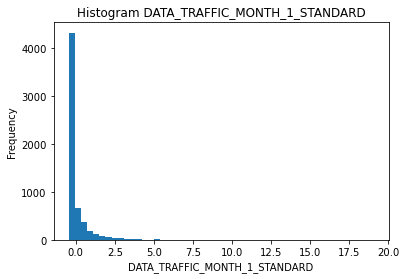

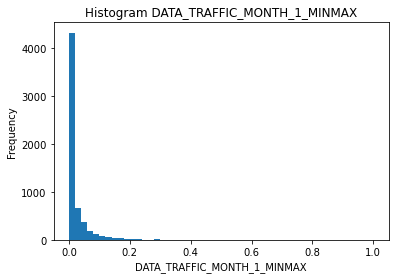

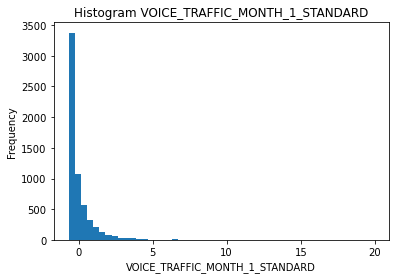

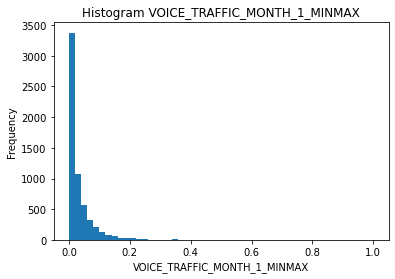

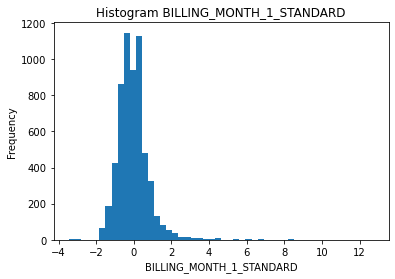

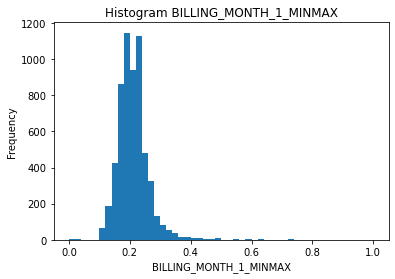

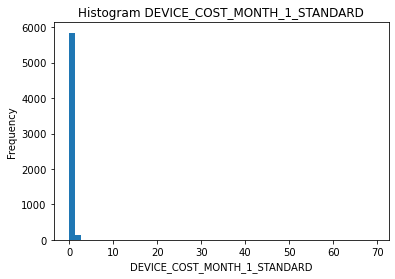

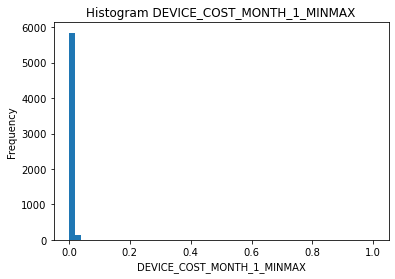

In [45]:
scale_columns = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for column in scale_columns:
    new_column_stand = f"{column}_STANDARD" #new column name
    df03[new_column_stand] = StandardScaler().fit_transform(df03[[column]]) #standardize the new column
    
    new_column_minmax = f"{column}_MINMAX"
    df03[new_column_minmax] = MinMaxScaler().fit_transform(df03[[column]]) #min-max scale the new column

plt.figure(figsize=(6, 4)) #plot histograms (one for standardize column and other for min-max scale for each scale_columns)
for column in df03.columns:
    if "_STANDARD" in column or "_MINMAX" in column:
        plt.hist(df03[column],bins=50)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram {column}')
        plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [47]:
df03['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = LabelEncoder().fit_transform(df03['PREVIOUS_DEVICE_BRAND']) #encode each different entry of col to int value

display(df03[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']])

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3
...,...,...
9994,Apple,0
9995,Apple,0
9996,Samsung,4
9997,Motorola,2


In [48]:
device_dummies = pd.get_dummies(df03['PREVIOUS_DEVICE_MANUF'], prefix='MANUF_') #convert col to multiple cols to variable

device_df_with_dummies = df03.join(device_dummies) #form df using join function

manuf_list = []
for column in device_df_with_dummies: #for used to display only the new created cols
    if "MANUF" in column: #we used prefix='MANUF' in get_dummies function so each column created starts with MANUF_
        manuf_list.append(column)
    
display(device_df_with_dummies[manuf_list]) #we only select the cols created by get_dummies function

,PREVIOUS_DEVICE_MANUF,PURCHASED_DEVICE_MANUFACTURER,MANUF__ASUSTek Computer Inc,MANUF__Apple Inc,MANUF__BLU Products Inc,MANUF__Beijing Flyscale Technologies Company Limited,MANUF__BlackBerry Limited,MANUF__Bullitt Group Limited,MANUF__CT Asia (HK) Ltd,MANUF__D-Link Corporation,...,MANUF__Telit Communications SpA,MANUF__Topmax Glory Limited,MANUF__Umi Network Technology Co Limited,MANUF__United Mobile,MANUF__United Time Hong Kong Ltd,MANUF__Vikin Communication Technology Co Limited,MANUF__Vogtec (H.K) Co Ltd,MANUF__Xiaomi Communications Co Ltd,MANUF__ZTE Corporation,MANUF__u-blox AG
0,"Motorola Mobility LLC, a Lenovo Company",LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Samsung Korea,LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Motorola Mobility LLC, a Lenovo Company",MOTOROLA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple Inc,LG,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Motorola Mobility LLC, a Lenovo Company",MOTOROLA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,Apple Inc,LG,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,Apple Inc,MOTOROLA,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,Samsung Korea,LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,"Motorola Mobility LLC, a Lenovo Company",LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.6. Feature generation

In [30]:
cols_billing_month = ['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                   'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']  #I could've done a loop instead of creating handmade large lists 

cols_device_cost_month = ['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                       'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']

cols_data_traffic = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                        'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']

cols_voice_traffic = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                         'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']


df03['BILLING_MEAN'] = df03[cols_billing_month].mean(axis=1) #create new cols for each stadistic
df03['BILLING_MAX'] = df03[cols_billing_month].max(axis=1)   #I used cntrlC and swapped name columns to do it
df03['BILLING_MIN'] = df03[cols_billing_month].min(axis=1)
df03['BILLING_RANGE'] = df03['BILLING_MAX'] - df03['BILLING_MIN']

df03['DEVICE_COST_MEAN'] = df03[cols_device_cost_month].mean(axis=1)
df03['DEVICE_COST_MAX'] = df03[cols_device_cost_month].max(axis=1)
df03['DEVICE_COST_MIN'] = df03[cols_device_cost_month].min(axis=1)
df03['DEVICE_COST_RANGE'] = df03['DEVICE_COST_MAX'] - df03['DEVICE_COST_MIN']

df03['DATA_TRAFFIC_MEAN'] = df03[cols_data_traffic].mean(axis=1)
df03['DATA_TRAFFIC_MAX'] = df03[cols_data_traffic].max(axis=1)
df03['DATA_TRAFFIC_MIN'] = df03[cols_data_traffic].min(axis=1)
df03['DATA_TRAFFIC_RANGE'] = df03['DATA_TRAFFIC_MAX'] - df03['DATA_TRAFFIC_MIN']

df03['VOICE_TRAFFIC_MEAN'] = df03[cols_voice_traffic].mean(axis=1)
df03['VOICE_TRAFFIC_MAX'] = df03[cols_voice_traffic].max(axis=1)
df03['VOICE_TRAFFIC_MIN'] = df03[cols_voice_traffic].min(axis=1)
df03['VOICE_TRAFFIC_RANGE'] = df03['VOICE_TRAFFIC_MAX'] - df03['VOICE_TRAFFIC_MIN']

stats_cols_list = []
for column in df03: #similar to 2.5 I create a loop to select the columns i want to display
    if "VOICE_TRAFFIC" in column or 'DATA_TRAFFIC' in column or 'DEVICE_COST' in column or 'BILLING' in column:
        stats_cols_list.append(column)
    
display(df03[stats_cols_list])

,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,DEVICE_COST_MIN,DEVICE_COST_RANGE,DATA_TRAFFIC_MEAN,DATA_TRAFFIC_MAX,DATA_TRAFFIC_MIN,DATA_TRAFFIC_RANGE,VOICE_TRAFFIC_MEAN,VOICE_TRAFFIC_MAX,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE
0,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,3.126760,21.799999,30.000000,...,12.0,0.0,646.062560,1169.39610,398.993770,770.402330,37.604459,79.699997,3.126760,76.573237
1,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,0.405465,0.500000,4.700000,...,0.0,0.0,376.582992,704.88519,232.241210,472.643980,3.050911,4.900000,0.405465,4.494535
2,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,5.392263,218.700000,56.799999,...,0.0,0.0,332.095862,484.62036,250.735660,233.884700,78.548710,218.700000,5.392263,213.307737
3,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,5.381279,216.300000,153.300000,...,6.0,0.0,1178.085005,4255.46040,146.766600,4108.693800,150.146880,231.200000,5.381279,225.818721
4,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,0.000000,0.000000,0.000000,...,0.0,0.0,2729.056633,5014.10300,1553.115000,3460.988000,63.983332,383.899990,0.000000,383.899990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,6.469250,644.000000,730.599980,...,0.0,0.0,5874.107850,11032.31700,2917.549800,8114.767200,548.811537,801.900020,6.469250,795.430770
9995,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,5.540086,253.700000,182.100010,...,0.0,0.0,15216.369733,24526.06600,7423.107400,17102.958600,173.756683,253.700000,5.540086,248.159914
9996,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,0.000000,0.000000,0.000000,...,9.0,0.0,471.851133,1007.76560,171.912730,835.852870,14.750000,88.500000,0.000000,88.500000
9997,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,0.000000,0.000000,0.000000,...,0.0,0.0,140.822200,230.53328,51.755936,178.777344,6.416667,38.500000,0.000000,38.500000


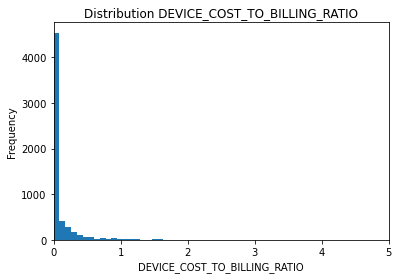

In [41]:
df03['DEVICE_COST_TO_BILLING_RATIO'] = df03['DEVICE_COST_MEAN']/df03['BILLING_MEAN'] #Calculem el ratio entre cols

plt.hist(df03['DEVICE_COST_TO_BILLING_RATIO'],bins=400) #formem histograma amb un gran número de bins per un major número de barres
plt.xlim(0,5) #limito l'eix x de 0 a 5 perquè els valors no passen d'aquest interval i així es veu millor la distribució
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
plt.title('Distribution DEVICE_COST_TO_BILLING_RATIO')
plt.show()

Si augmentem el paràmetre ```bins``` de la funció ```hist``` per tenir un número més elevat de barres al histograma, es pot observar una distribució exponencial amb un gran alt valor del paràmetre exponencial λ.

## 2.7. Text parsing/processing

In [53]:
split_data1 = df03['PURCHASED_DEVICE'].str.split('_',1, expand=True) #first col of split_data1 has the code and second the rest
split_data2 = split_data1[1].str.split(' ', 1, expand=True) #first col of split_data2 has manufacturer and second the model
split_data1[1] = split_data2[0] #We mantain first col of split_data1, and for the other 2 cols we use the ones from split_data2
split_data1[2] = split_data2[1]

#code could be more optimized but the logic works correctly

df03['PURCHASED_DEVICE_CODE'] = split_data1[0] #we add the new coumns to the dataframe
df03['PURCHASED_DEVICE_MANUFACTURER'] = split_data1[1]
df03['PURCHASED_DEVICE_MODEL'] = split_data1[2]
display(df03[['PURCHASED_DEVICE_CODE','PURCHASED_DEVICE_MANUFACTURER','PURCHASED_DEVICE_MODEL']])

,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...
9994,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [33]:
print("\nDevices per Manufacturer in PURCHASED_DEVICE_MANUFACTURER:")

num_device_per_manuf1 = {}

for manuf in df03['PURCHASED_DEVICE_MANUFACTURER']: #we count number of devices per manufacturer
    if manuf in num_device_per_manuf1:
        num_device_per_manuf1[manuf] += 1
    else:
        num_device_per_manuf1[manuf] = 1
num_device_per_manuf1 = list(sorted(num_device_per_manuf1.items(), key=lambda item: item[1], reverse=True)) #pass dict to ordered list, the key parameter allows to get the item not the key of dict
num_device_per_manuf1 = pd.DataFrame(num_device_per_manuf1,columns=['MANUFACTURER','NUMBER_OF_DEVICES']) #list to dataframe
display(num_device_per_manuf1)


print("\nDevices per Manufacturer in PREVIOUS_DEVICE_MANUF:")

num_device_per_manuf2 = {}

for manuf in df03['PREVIOUS_DEVICE_MANUF']: #same code as before but with col PREVIOUS_DEVICE_MANUF
    if manuf in num_device_per_manuf2:
        num_device_per_manuf2[manuf] += 1
    else:
        num_device_per_manuf2[manuf] = 1
num_device_per_manuf2 = list(sorted(num_device_per_manuf2.items(), key=lambda item: item[1], reverse=True))
num_device_per_manuf2 = pd.DataFrame(num_device_per_manuf2,columns=['MANUFACTURER','NUMBER_OF_DEVICES'])
display(num_device_per_manuf2)


Devices per Manufacturer in PURCHASED_DEVICE_MANUFACTURER:


,MANUFACTURER,NUMBER_OF_DEVICES
0,LG,3556
1,SAMSUNG,1094
2,MOTOROLA,630
3,APPLE,448
4,ALCATEL,258
5,ASUS,2



Devices per Manufacturer in PREVIOUS_DEVICE_MANUF:


,MANUFACTURER,NUMBER_OF_DEVICES
0,Samsung Korea,1879
1,Apple Inc,1495
2,"Motorola Mobility LLC, a Lenovo Company",849
3,LG Electronics Inc.,506
4,TCL Communication Ltd,279
...,...,...
62,Fibocom Wireless Inc,1
63,Mundo Reader S.L.,1
64,Topmax Glory Limited,1
65,HK Elephone Communication Tech Co Limited,1


## 2.8. Splitting and sampling a dataset

In [34]:
train_df, test_df = train_test_split(df03, test_size=0.3) #separem dataset 70%,30% afegint paràmetre test_size=0.3 per mostrar tamany del test dataframe

print("Training dataset shape:", train_df.shape) 
print("Testing dataset shape:", test_df.shape)

Training dataset shape: (4191, 62)
Testing dataset shape: (1797, 62)


In [35]:
columns_stats = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

training_stats = train_df[columns_stats].describe() #mostrem estadístiques amb funció describe mostrada a un exercici anterior

testing_stats = test_df[columns_stats].describe()

print("\nStatistics Training part Dataset:") #mostrem dataframe per les dues parts del dataset per separat
training_stats = pd.DataFrame(training_stats)
display(training_stats)

print("\nStatistics Testing part Dataset:")
testing_stats = pd.DataFrame(testing_stats)
display(testing_stats)


Statistics Training part Dataset:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4191.000000,4191.000000,4191.000000
mean,2601.328230,129.211954,99.687807
std,5685.316281,200.626233,66.282934
min,0.000000,0.000000,-124.490000
25%,0.000000,10.700000,63.000000
50%,397.891690,61.799999,92.960000
75%,2770.398550,169.049995,121.140000
max,112421.170000,4113.000000,926.410000



Statistics Testing part Dataset:


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1797.000000,1797.000000,1797.000000
mean,2446.585341,133.668002,99.223278
std,5976.849468,199.186761,61.810503
min,0.000000,0.000000,-114.020000
25%,0.000000,7.900000,64.960000
50%,351.287510,64.099998,92.990000
75%,2547.591100,168.700000,120.840000
max,100259.960000,2000.300000,772.720000


En el cas de ```DATA_TRAFFIC_MONTH_1``` les estadìstiques coincideixen menys en la std i el max, on en els dos casos el valor a la testing part del Dataset és significativament major respecte a la training part. Les estadístiques en ```VOICE_TRAFFIC_MONTH_1``` són d'una forma inversament similar al cas anterior, ja que els valors de la std i el max són menors en la testing part del Dataset respecte la training part, el max d'una manera destacable. Per últim en ```BILLING_MONTH_1```, totes les estadístiques són similars menys en el min i el max, prenent valors menys elevats en la testing part del Dataset.

# 3. Comparing iPhone and Samsung J series users

In [36]:
#If PURCHASED_DEVICE_MANUFACTURER column value it is equal to APPLE and PURCHASED_DEVICE_MODEL column value starts with IPHONE we add it to the variable
apple_df = df03[(df03['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE') & (df03['PURCHASED_DEVICE_MODEL'].str.startswith('IPHONE'))]
#Same but now for Samsung J series users
samsung_df = df03[(df03['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG') & (df03['PURCHASED_DEVICE_MODEL'].str.startswith('J'))]

print('\nAttributes of Apple iPhone users:')
display(apple_df)

print('\nAttributes of Samsung J series users:')
display(samsung_df)


Attributes of Apple iPhone users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DATA_TRAFFIC_MIN,DATA_TRAFFIC_RANGE,VOICE_TRAFFIC_MEAN,VOICE_TRAFFIC_MAX,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.7009,2101.68160,3224.2834,206.899990,...,1520.20560,1704.07780,324.802228,550.900020,6.313367,544.586653,0.088564,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.0,20170901.0,990.27838,1011.09700,1011.09700,1025.9695,2778.35010,1822.9507,102.900000,...,990.27838,1788.07172,91.086994,172.700000,3.921973,168.778027,1.984529,DGAP067C2000,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.0,20161001.0,3916.90450,2703.32230,2703.32230,1860.9038,3112.77320,2625.4236,160.899990,...,1860.90380,2056.00070,154.616138,243.500000,5.196838,238.303162,0.498593,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
52,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2841.0,20170901.0,1017.50700,1079.26210,1079.26210,1178.9795,1192.96750,1070.2297,303.200010,...,1017.50700,175.46050,204.553023,303.200010,5.318120,297.881890,0.039319,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
53,DGAP067C2007_APPLE IPHONE 8 64GB CINZA PPB/PI...,2961.0,20170901.0,257.38675,604.08844,604.08844,1394.2441,102.59875,107.8400,117.300000,...,102.59875,1291.64535,95.421917,133.399990,4.831509,128.568481,0.075834,DGAP067C2007,APPLE,IPHONE 8 64GB CINZA PPB/PI643/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3345.0,20171001.0,8028.22750,4791.39990,4791.39990,4890.1880,6867.35640,4825.1050,31.400000,...,4791.39990,3236.82760,5.233333,31.400000,0.000000,31.400000,1.171426,DGAP068C2000,APPLE,IPHONE 8 256GB CINZA PPB/PI643/10
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,3636.13940,3975.19480,3975.19480,4893.0195,4364.04200,3992.2976,18.500000,...,3636.13940,1256.88010,3.234244,18.500000,0.000000,18.500000,0.000000,DGAP08163000,APPLE,IPHONE XR 64GB PRETO
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.0,20170101.0,1023.11510,2831.42140,2831.42140,3015.2114,2819.55590,1135.8162,51.700001,...,1023.11510,1992.09630,8.616667,51.700001,0.000000,51.700001,0.103251,DGAP069C3000,APPLE,IPHONE 8 PLUS 64GB CINZA BASICO
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,2432.91110,5159.84620,5159.84620,3041.3901,2613.57930,2976.4900,85.400002,...,2432.91110,2726.93510,14.411668,85.400002,0.000000,85.400002,0.000000,DGAP08163000,APPLE,IPHONE XR 64GB PRETO



Attributes of Samsung J series users:


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DATA_TRAFFIC_MIN,DATA_TRAFFIC_RANGE,VOICE_TRAFFIC_MEAN,VOICE_TRAFFIC_MAX,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,DEVICE_COST_TO_BILLING_RATIO,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.0,NaN,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,171.300000,...,0.000000,0.000000,200.320176,307.000000,5.321057,301.678943,0.000000,TGSA32062000,SAMSUNG,J415G SMART PRETO PPB/PI107/04
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.0,20160801.0,4.528594,464.08774,695.09595,223.33020,223.330200,247.85382,298.000000,...,4.528594,690.567356,206.398915,298.000000,5.493473,292.506527,0.040427,TGSA32564007,SAMSUNG,J260M SMART PRETO PPB/PI324/14
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.0,20141001.0,8396.934600,9907.53130,9907.53130,5994.02100,6872.605500,5246.00390,153.000000,...,5246.003900,4661.527400,96.828562,153.000000,4.871373,148.128627,0.283280,TGSA32162007,SAMSUNG,J610G SMART PRETO PPB/PI107/04
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.0,20140101.0,2047.255400,1597.98750,1597.98750,1501.04900,843.063050,1631.06650,74.400002,...,843.063050,1204.192350,67.001813,92.900002,4.110874,88.789128,0.000000,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
58,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,873.0,20140101.0,4185.320300,2036.57420,2036.57420,424.26801,2934.921100,2847.60990,61.000000,...,424.268010,3761.052290,72.696380,117.900000,4.778283,113.121717,0.000000,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,TGSA32164007_SAMSUNG J610G SMART PRETO PPB/PI3...,1065.0,20170101.0,5344.534700,3875.45610,3875.45610,2059.94530,6818.612300,2639.68970,903.299990,...,2059.945300,4758.667000,457.955747,903.299990,6.134482,897.165508,0.385244,TGSA32164007,SAMSUNG,J610G SMART PRETO PPB/PI324/14
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.0,NaN,4343.867700,5593.42580,5593.42580,4548.74560,80.533676,1497.05050,10.600000,...,80.533676,5512.892124,1.766667,10.600000,0.000000,10.600000,0.000000,TGSA31562000,SAMSUNG,J810M SMART PRETO PPB/PI107/04
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.0,20180201.0,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,161.300000,...,0.000000,0.000000,26.883333,161.300000,0.000000,161.300000,0.178261,TGSA28564007,SAMSUNG,J105 SMART PRETO PPB/PI324/14
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.0,20161001.0,5656.491200,4798.86520,4798.86520,5056.85060,4584.034700,5088.20260,104.700000,...,4584.034700,1072.456500,65.638126,138.600010,4.128746,134.471264,0.000000,TGSA31362000,SAMSUNG,J400M SMART PRETO PPB/PI107/04


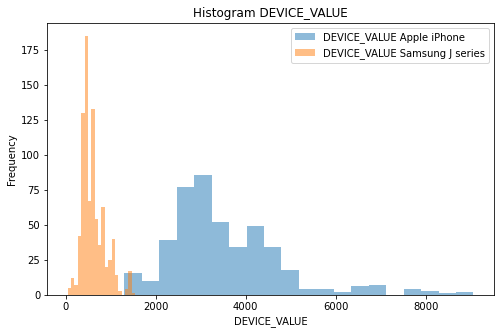

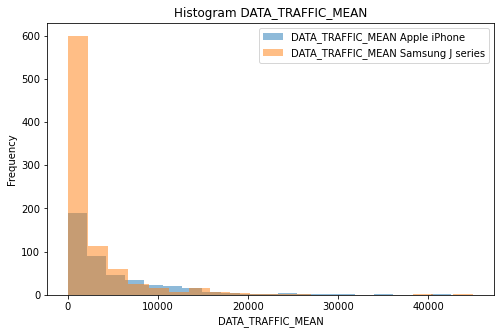

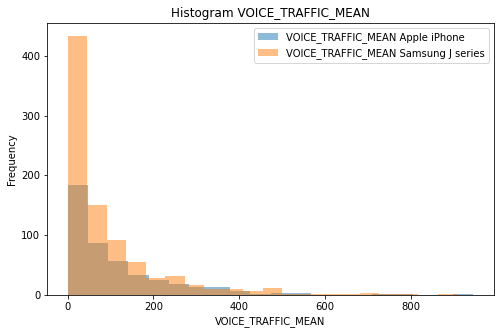

In [37]:
cols = ['DEVICE_VALUE', 'DATA_TRAFFIC_MEAN', 'VOICE_TRAFFIC_MEAN'] #I choose this cols because they are more general and can represent visual differences in the plot
for col in cols: #plot 3 cols
    plt.figure(figsize=(8, 5))
    plt.hist(apple_df[col], alpha=0.5, label=f'{col} Apple iPhone', bins=20) #labels composed with col name and device name
    plt.hist(samsung_df[col], alpha=0.5, label=f'{col} Samsung J series', bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram {col}')
    plt.legend()
    plt.show()

En el histograma DEVICE_VALUE podem observar com els preus de Apple iPhone són més elevats respecte als preus dels dispositius de la serie J de Samsung, ja que el pic màxim de frequència (tenint en compte que els dos segueixen una distribució normal) de Apple es dona a un preu més elevat respecte Samsung. Per un altre part tant en el histograma DATA_TRAFFIC_MEAN, com en el VOICE_TRAFFIC_MEAN el valor de paràmetre λ (segueixen distribució exponencial), no és tan elevat per Apple iPhone respecte Samsung J series. Per VOICE_TRAFFIC_MEAN tenir un λ superior vol dir que les trucades arriben més freqüentment, i a DATA_TRAFFIC_MEAN, vol dir que el tràfic de dades és superior per als models J de Samsung respecte als models iPhone de Apple.

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>